# Goals

5. Build one prediction model using the ML algorithms of this course
6. Evaluate your prediction model
7. Try different ways to improve your model and show the improvements.
8. Submit code and results in Jupyter and HTML formats on canvas

### You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

##### Imports

In [71]:
import numpy as np
import pandas as pd

##### Read in Data

In [72]:
item_cat = pd.read_csv("data/item_categories.csv")
items = pd.read_csv("data/items.csv")
sales = pd.read_csv("data/sales_train.csv")
shops = pd.read_csv("data/shops.csv")

In [73]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [74]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [75]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [76]:
sales.isnull()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2935844,False,False,False,False,False,False
2935845,False,False,False,False,False,False
2935846,False,False,False,False,False,False
2935847,False,False,False,False,False,False


In [77]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [78]:
test = pd.read_csv("data/test.csv")
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [79]:
sales["date_block_num"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

##### Checking for null values
* we can see there there are no null values in our datasets

In [80]:
item_cat.isnull().any()

item_category_name    False
item_category_id      False
dtype: bool

In [81]:
items.isnull().any()

item_name           False
item_id             False
item_category_id    False
dtype: bool

In [82]:
shops.isnull().any()

shop_name    False
shop_id      False
dtype: bool

In [83]:
sales.isnull().any()

date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
dtype: bool

##### Focusing on Sales csv file

In [84]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


##### We do not want any negative values so we are going to drop them

In [17]:
sales = sales[sales["item_cnt_day"] > 0]
sales = sales[sales["item_price"] > 0]

In [18]:
sales.describe().astype(int)

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2928492,2928492,2928492,2928492,2928492
mean,14,33,10200,889,1
std,9,16,6324,1727,2
min,0,0,0,0,1
25%,7,22,4477,249,1
50%,14,31,9355,399,1
75%,23,47,15691,999,1
max,33,59,22169,307980,2169


##### Viewing Outliers in selected features

In [19]:
import seaborn as sns
sns.boxplot(x=sales['item_cnt_day'])

<AxesSubplot:xlabel='item_cnt_day'>

<AxesSubplot:xlabel='item_price'>

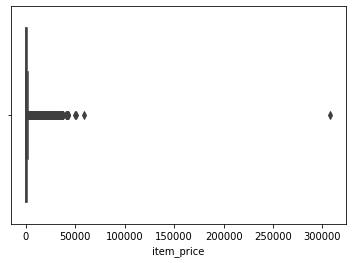

In [20]:
sns.boxplot(x=sales['item_price'])

##### Using Z-score method to reduce the amount of outliers in the dataset

In [21]:
from sklearn.preprocessing import StandardScaler
sales['zscore']=StandardScaler().fit_transform(sales.loc[: ,['item_cnt_day']].values)
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,zscore
0,02.01.2013,0,59,22154,999.00,1.0,-0.0948
1,03.01.2013,0,25,2552,899.00,1.0,-0.0948
3,06.01.2013,0,25,2554,1709.05,1.0,-0.0948
4,15.01.2013,0,25,2555,1099.00,1.0,-0.0948
5,10.01.2013,0,25,2564,349.00,1.0,-0.0948
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,-0.0948
2935845,09.10.2015,33,25,7460,299.00,1.0,-0.0948
2935846,14.10.2015,33,25,7459,349.00,1.0,-0.0948
2935847,22.10.2015,33,25,7440,299.00,1.0,-0.0948


In [22]:
np.sort(sales["zscore"].unique().astype(int))

array([  0,   0,   0,   1,   1,   1,   2,   2,   2,   3,   3,   4,   4,
         4,   5,   5,   6,   6,   6,   7,   7,   7,   8,   8,   9,   9,
         9,  10,  10,  10,  11,  11,  12,  12,  12,  13,  13,  14,  14,
        14,  15,  15,  15,  16,  16,  17,  17,  17,  18,  18,  18,  19,
        19,  20,  20,  20,  21,  21,  22,  22,  22,  23,  23,  23,  24,
        24,  25,  25,  25,  26,  26,  27,  27,  27,  28,  28,  28,  29,
        29,  30,  30,  30,  31,  31,  31,  32,  32,  33,  33,  33,  34,
        34,  35,  35,  36,  36,  36,  37,  37,  38,  38,  38,  39,  39,
        39,  40,  40,  41,  41,  41,  42,  42,  43,  43,  43,  44,  44,
        45,  46,  47,  48,  48,  48,  49,  49,  49,  50,  50,  51,  52,
        52,  52,  53,  54,  55,  55,  56,  56,  56,  57,  57,  58,  59,
        59,  60,  61,  62,  63,  63,  64,  67,  70,  73,  73,  75,  77,
        78,  82,  84,  87,  87,  91,  91,  95,  96, 100, 109, 113, 114,
       119, 123, 130, 152, 154, 156, 182, 190, 190, 191, 191, 19

In [23]:
threshold = 1
sales = sales[sales["zscore"] < 1]

In [24]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,zscore
0,02.01.2013,0,59,22154,999.00,1.0,-0.0948
1,03.01.2013,0,25,2552,899.00,1.0,-0.0948
3,06.01.2013,0,25,2554,1709.05,1.0,-0.0948
4,15.01.2013,0,25,2555,1099.00,1.0,-0.0948
5,10.01.2013,0,25,2564,349.00,1.0,-0.0948


In [25]:
sales['zscore_item_price']=StandardScaler().fit_transform(sales.loc[: ,['item_price']].values)
sales

C:\Users\PScout\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,zscore,zscore_item_price
0,02.01.2013,0,59,22154,999.00,1.0,-0.0948,0.066182
1,03.01.2013,0,25,2552,899.00,1.0,-0.0948,0.007844
3,06.01.2013,0,25,2554,1709.05,1.0,-0.0948,0.480411
4,15.01.2013,0,25,2555,1099.00,1.0,-0.0948,0.124520
5,10.01.2013,0,25,2564,349.00,1.0,-0.0948,-0.313016
...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,-0.0948,-0.342185
2935845,09.10.2015,33,25,7460,299.00,1.0,-0.0948,-0.342185
2935846,14.10.2015,33,25,7459,349.00,1.0,-0.0948,-0.313016
2935847,22.10.2015,33,25,7440,299.00,1.0,-0.0948,-0.342185


In [26]:
threshold = 1
sales = sales[sales["zscore_item_price"] < 1]

In [27]:
sales.describe().astype(int)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,zscore,zscore_item_price
count,2729239,2729239,2729239,2729239,2729239,2729239,2729239
mean,14,33,10338,639,1,0,0
std,9,16,6318,591,0,0,0
min,0,0,0,0,1,0,0
25%,6,22,4637,249,1,0,0
50%,13,31,9797,399,1,0,0
75%,22,47,15843,849,1,0,0
max,33,59,22168,2599,3,0,0


<AxesSubplot:xlabel='item_cnt_day'>

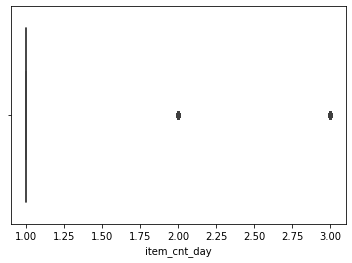

In [28]:
import seaborn as sns
sns.boxplot(x=sales['item_cnt_day'])

<AxesSubplot:xlabel='item_price'>

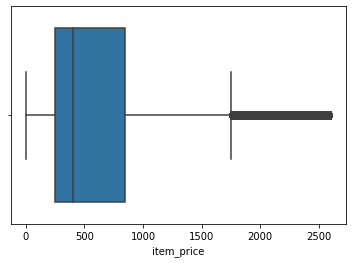

In [29]:
sns.boxplot(x=sales['item_price'])

In [30]:
sales.drop(["zscore","zscore_item_price"],axis=1,inplace=True)

C:\Users\PScout\anaconda3\envs\tensor\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##### Reformatting the date in the dataset so I can use the groupby function

In [85]:
sales['date'] = pd.to_datetime(sales["date"])
sales['month'] = sales['date'].dt.month

<AxesSubplot:xlabel='item_cnt_day'>

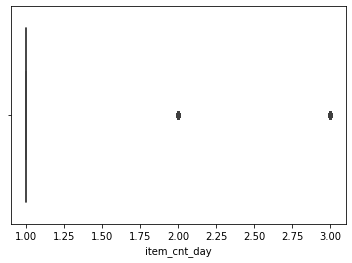

In [32]:
import seaborn as sns
sns.boxplot(x=sales['item_cnt_day'])

<AxesSubplot:xlabel='item_price'>

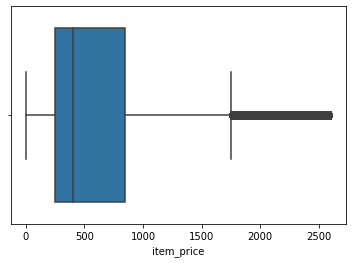

In [33]:
sns.boxplot(x=sales['item_price'])

In [86]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,2013-02-01,0,59,22154,999.00,1.0,2
1,2013-03-01,0,25,2552,899.00,1.0,3
2,2013-05-01,0,25,2552,899.00,-1.0,5
3,2013-06-01,0,25,2554,1709.05,1.0,6
4,2013-01-15,0,25,2555,1099.00,1.0,1


In [87]:
sales.drop(["date"],axis=1,inplace=True)

In [88]:
sales

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,0,59,22154,999.00,1.0,2
1,0,25,2552,899.00,1.0,3
2,0,25,2552,899.00,-1.0,5
3,0,25,2554,1709.05,1.0,6
4,0,25,2555,1099.00,1.0,1
...,...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0,10
2935845,33,25,7460,299.00,1.0,9
2935846,33,25,7459,349.00,1.0,10
2935847,33,25,7440,299.00,1.0,10


##### This is what dataframe

In [93]:
dbn = np.array(sales.groupby(["date_block_num",'month',"shop_id","item_id","item_price"]).agg({'item_cnt_day':'sum'}).index.get_level_values(0))
mons = np.array(sales.groupby(["date_block_num",'month',"shop_id","item_id","item_price"]).agg({'item_cnt_day':'sum'}).index.get_level_values(1))
shop_ident = np.array(sales.groupby(["date_block_num",'month',"shop_id","item_id","item_price"]).agg({'item_cnt_day':'sum'}).index.get_level_values(2))
item_ident = np.array(sales.groupby(["date_block_num",'month',"shop_id","item_id","item_price"]).agg({'item_cnt_day':'sum'}).index.get_level_values(3))
#date_block = np.array(sales.groupby(['month',"shop_id","item_id","item_category","date_block_num","item_price"]).agg({'item_cnt_day':'sum'}).index.get_level_values(3))
price_item = np.array(sales.groupby(["date_block_num",'month',"shop_id","item_id","item_price"]).agg({'item_cnt_day':'sum'}).index.get_level_values(4))
cum = np.array(sales.groupby(["date_block_num",'month',"shop_id","item_id","item_price"]).agg({'item_cnt_day':'sum'})).astype(int)

In [94]:
mons.shape

(2306364,)

In [95]:
shop_ident.shape

(2306364,)

In [96]:
item_ident.shape

(2306364,)

In [97]:
cum = cum.reshape(-1)
cum.shape

(2306364,)

In [98]:
df = pd.DataFrame({"date_block_num":dbn,"month":mons,"shop_id":shop_ident,"item_id":item_ident,"item_price":price_item,"total_products_sold":cum})

In [99]:
df.describe().astype(int)

,date_block_num,month,shop_id,item_id,item_price,total_products_sold
count,2306364,2306364,2306364,2306364,2306364,2306364
mean,14,6,32,10327,861,1
std,9,3,16,6285,1703,4
min,0,1,0,0,-1,-22
25%,6,3,21,4717,229,1
50%,14,6,31,9793,399,1
75%,23,9,47,15775,949,1
max,33,12,59,22169,307980,2169


In [100]:
df

,date_block_num,month,shop_id,item_id,item_price,total_products_sold
0,0,1,0,32,221.0,4
1,0,1,0,33,347.0,2
2,0,1,0,35,247.0,1
3,0,1,0,43,221.0,1
4,0,1,0,51,127.0,1
...,...,...,...,...,...,...
2306359,33,12,59,17775,399.0,2
2306360,33,12,59,18441,299.0,1
2306361,33,12,59,19289,999.0,1
2306362,33,12,59,19688,299.0,1


In [65]:
df.sample(1000)

,month,shop_id,item_id,item_price,total_products_sold
396737,3,35,10955,349.0,1
1342097,10,10,21802,95.0,1
742479,5,58,16737,999.0,1
153095,2,2,6064,599.0,1
687023,5,37,9696,549.0,1
...,...,...,...,...,...
1510059,11,28,18885,399.0,1
1281525,9,42,16856,149.0,1
843660,6,44,2189,199.0,1
418378,3,45,14363,249.0,2


In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn import metrics
samp = df.sample(1000)

x = samp.drop(["total_products_sold"],axis=1).values
y = samp["total_products_sold"].values
rse_lst = list()
kf = KFold(shuffle=True,random_state=141)

for train_index,test_index in kf.split(x):
    print("splitting")
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]
    clf = RandomForestRegressor()
    print("fitting model")
    clf.fit(x_train,y_train)
    print("predicting")
    y_pred = clf.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rse = metrics.r2_score(y_test, y_pred)
    print('Mean Absolute Error:', mae)  
    print('Mean Squared Error:', mse)  
    print('Root Mean Squared Error:', rmse)
    print('R-squared Error:', rse)
    rse_lst.append(rse)

splitting
fitting model
predicting
Mean Absolute Error: 0.8569
Mean Squared Error: 2.494798
Root Mean Squared Error: 1.5794929566161413
R-squared Error: -0.02262584030168857
splitting
fitting model
predicting
Mean Absolute Error: 0.6589
Mean Squared Error: 1.1323530000000002
Root Mean Squared Error: 1.064120763823355
R-squared Error: -0.1335148527240424
splitting
fitting model
predicting
Mean Absolute Error: 0.6783500000000001
Mean Squared Error: 1.5172575000000001
Root Mean Squared Error: 1.2317700678292196
R-squared Error: -0.21694571995749046
splitting
fitting model
predicting
Mean Absolute Error: 0.7328
Mean Squared Error: 1.629178
Root Mean Squared Error: 1.2763925728395633
R-squared Error: -0.13581037037037036
splitting
fitting model
predicting
Mean Absolute Error: 0.8291
Mean Squared Error: 2.439866
Root Mean Squared Error: 1.5620070422376462
R-squared Error: -0.07180899666139506


In [107]:
dict(reversed(sorted(zip(clf.feature_importances_, df.columns.values))))

{0.3393588757231554: 'item_id',
 0.25665414019241534: 'item_price',
 0.14814473586158947: 'date_block_num',
 0.14806936165631435: 'shop_id',
 0.10777288656652541: 'month'}

In [103]:
np.mean(rse_lst)

-3.3598527281253348